<a href="https://colab.research.google.com/github/saadiya19wh1a12a4/II-IT---B-LAB/blob/master/Copy_of_DecisionTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Objectives

At the end of the experiment you will be able to

* understand Decision Tree algorithm
* apply Decision tree on any dataset to learn insights from the dataset

## Dataset

The dataset choosen for this experiment is hotel booking dataset. The dataset contains 43917 samples and 32 columns. The target variable in the dataset is **is_canceled**

In [ ]:
# Run this cell to download the dataset
!wget https://cdn.talentsprint.com/aiml/Wise/hotel_bookings.csv

--2020-08-26 13:21:06--  https://cdn.talentsprint.com/aiml/Wise/hotel_bookings.csv
Resolving cdn.talentsprint.com (cdn.talentsprint.com)... 172.105.34.236
Connecting to cdn.talentsprint.com (cdn.talentsprint.com)|172.105.34.236|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16855599 (16M) [application/octet-stream]
Saving to: ‘hotel_bookings.csv’

hotel_bookings.csv  100%[===================>]  16.07M  5.19MB/s    in 3.1s    

2020-08-26 13:21:10 (5.19 MB/s) - ‘hotel_bookings.csv’ saved [16855599/16855599]



### Exercise 1

Importing necessary libraries

In [ ]:
# YOUR CODE HERE
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.model_selection import train_test_split
import pydotplus

### Exercise 2

Load the dataset

In [ ]:
# YOUR CODE HERE
data = pd.read_csv("/content/hotel_bookings.csv",converters={"deposit_type":converter,'hotel':converter, 'reservation_status' : converter, 'arrival_date_month':converter, 'meal':converter, 'country':converter, 'market_segment':converter, 'distribution_channel':converter, 'reserved_room_type':converter, 'assigned_room_type':converter, 'deposit_type':converter, 'customer_type':converter, 'reservation_status':converter})

### Exercise 3

Convert all categorical values into numeric

In [ ]:
# YOUR CODE HERE
def converter(a):
  if a == 'Resort Hotel':
    return 0
  elif a == 'July':
    return -1
  elif a == 'BB':
    return 2
  elif a == 'PRT':
    return 3
  elif a == 'Direct':
    return 4
  elif a == 'A':
    return 5
  elif a == 'No Deposit':
    return 6
  elif a == 'Transient':
    return 7
  elif a == 'Check-Out':
    return 8
  else:
    return -1          

In [ ]:
data.shape

(119390, 32)

In [ ]:
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,0,0,342,2015,-1,27,1,0,0,2,0.0,0,2,3,4,4,0,0,0,-1,-1,3,6,NaN,NaN,0,7,0.0,0,0,8,2015-07-01
1,0,0,737,2015,-1,27,1,0,0,2,0.0,0,2,3,4,4,0,0,0,-1,-1,4,6,NaN,NaN,0,7,0.0,0,0,8,2015-07-01
2,0,0,7,2015,-1,27,1,0,1,1,0.0,0,2,-1,4,4,0,0,0,5,-1,0,6,NaN,NaN,0,7,75.0,0,0,8,2015-07-02
3,0,0,13,2015,-1,27,1,0,1,1,0.0,0,2,-1,-1,-1,0,0,0,5,5,0,6,304.0,NaN,0,7,75.0,0,0,8,2015-07-02
4,0,0,14,2015,-1,27,1,0,2,2,0.0,0,2,-1,-1,-1,0,0,0,5,5,0,6,240.0,NaN,0,7,98.0,0,1,8,2015-07-03


In [ ]:
data.describe()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.0,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,-0.664461,0.370416,104.011416,2016.156554,-1.0,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,1.319541,0.627942,-0.472066,-0.386674,0.031912,0.087118,0.137097,3.321668,2.721568,0.221124,5.135246,86.693382,189.266735,2.321149,5.004724,101.831122,0.062518,0.571363,4.666253
std,0.472181,0.482918,106.863097,0.707476,0.0,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,1.256330,1.965097,1.536546,1.640270,0.175767,0.844336,1.497437,2.693186,2.911943,0.652306,2.303372,110.774548,131.655015,17.594721,3.461384,50.535790,0.245291,0.792798,4.346264
min,-1.000000,0.000000,0.000000,2015.000000,-1.0,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,0.000000,-1.000000,1.000000,6.000000,0.000000,-1.000000,-6.380000,0.000000,0.000000,-1.000000
25%,-1.000000,0.000000,18.000000,2016.000000,-1.0,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,2.000000,-1.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,0.000000,6.000000,9.000000,62.000000,0.000000,7.000000,69.290000,0.000000,0.000000,-1.000000
50%,-1.000000,0.000000,69.000000,2016.000000,-1.0,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,2.000000,-1.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,5.000000,5.000000,0.000000,6.000000,14.000000,179.000000,0.000000,7.000000,94.575000,0.000000,0.000000,8.000000
75%,0.000000,1.000000,160.000000,2017.000000,-1.0,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,2.000000,3.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,5.000000,5.000000,0.000000,6.000000,229.000000,270.000000,0.000000,7.000000,126.000000,0.000000,1.000000,8.000000
max,0.000000,1.000000,737.000000,2017.000000,-1.0,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,2.000000,3.000000,4.000000,4.000000,1.000000,26.000000,72.000000,5.000000,5.000000,21.000000,6.000000,535.000000,543.000000,391.000000,7.000000,5400.000000,8.000000,5.000000,8.000000


In [ ]:
data.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,-1,0,23,2017,-1,35,30,2,5,2,0.0,0,2,-1,-1,-1,0,0,0,5,5,0,6,394.0,NaN,0,7,96.14,0,0,8,2017-09-06
119386,-1,0,102,2017,-1,35,31,2,5,3,0.0,0,2,-1,-1,-1,0,0,0,-1,-1,0,6,9.0,NaN,0,7,225.43,0,2,8,2017-09-07
119387,-1,0,34,2017,-1,35,31,2,5,2,0.0,0,2,-1,-1,-1,0,0,0,-1,-1,0,6,9.0,NaN,0,7,157.71,0,4,8,2017-09-07
119388,-1,0,109,2017,-1,35,31,2,5,2,0.0,0,2,-1,-1,-1,0,0,0,5,5,0,6,89.0,NaN,0,7,104.40,0,0,8,2017-09-07
119389,-1,0,205,2017,-1,35,29,2,7,2,0.0,0,-1,-1,-1,-1,0,0,0,5,5,0,6,9.0,NaN,0,7,151.20,0,2,8,2017-09-07


### Exercise 4

Remove unwanted coloumns

In [ ]:

data.drop(['agent','company', 'reservation_status_date'],axis = 1, inplace = True)

In [ ]:
features = data[['hotel',	'arrival_date_year',	'arrival_date_week_number',	'arrival_date_day_of_month',	'stays_in_weekend_nights',	'stays_in_week_nights',	'adults', 'is_repeated_guest',	'previous_cancellations',	'previous_bookings_not_canceled',	'booking_changes',	'deposit_type',	'days_in_waiting_list',	'required_car_parking_spaces',	'total_of_special_requests',	'reservation_status']]
labels = data[['is_canceled']]

### Exercise 5

Divide the dataset into train and test sets

In [ ]:
# YOUR CODE HERE
X_train, X_test, y_train, y_test = train_test_split(features,labels,test_size=0.3)

### Exercise 6

Apply decision tree alogrithm to predict the target variable

In [ ]:
# YOUR CODE HERE
model = DecisionTreeClassifier(criterion="entropy",max_depth=3, random_state=5)
model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=5, splitter='best')

### Exercise 7

What happens if you choose criterion as "Entropy"?

In [ ]:
# YOUR CODE HERE
y_test_pre = model.predict(X_test)
y_train_pre = model.predict(X_train)
print("Actual testing : ",y_test)
print("predicted testing :", y_test_pre)
print("Actual training : ", y_train)
print("predicted training : ", y_train_pre)

Actual testing :         is_canceled
86841            0
74922            1
11376            1
97618            0
49587            1
...            ...
24528            0
47538            1
74983            1
17464            0
87933            0

[35817 rows x 1 columns]
predicted testing : [0 1 1 ... 1 0 0]
Actual training :          is_canceled
62385             1
67192             1
75448             1
41960             0
107474            0
...             ...
56929             1
55755             1
74094             1
62826             1
31910             0

[83573 rows x 1 columns]
predicted training :  [1 1 1 ... 1 1 0]


In [ ]:
from sklearn.metrics import accuracy_score
print("Training Accuracy : ", accuracy_score(y_train,y_train_pre)*100)
print("Testing Accuracy : ", accuracy_score(y_test,y_test_pre)*100)

Training Accuracy :  100.0
Testing Accuracy :  100.0


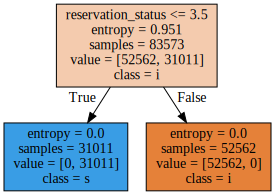

In [ ]:
import graphviz
from sklearn import tree
# DOT data
dot_data = tree.export_graphviz(model, out_file=None, 
                                feature_names=['hotel',	'arrival_date_year',	'arrival_date_week_number',	'arrival_date_day_of_month',	'stays_in_weekend_nights',	'stays_in_week_nights',	'adults', 'is_repeated_guest',	'previous_cancellations',	'previous_bookings_not_canceled',	'booking_changes',	'deposit_type',	'days_in_waiting_list',	'required_car_parking_spaces',	'total_of_special_requests',	'reservation_status'],  
                                class_names="is_canceled", filled = True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph